## 1. How many sequences?
## 2. The lenght of sequences?
## 3. The longest (shortest) sequences?
## 4. Amino-acid frequency?

In [1]:
import gzip
import re
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
#from collections import OrderedDict
import numpy as np

In [2]:
with gzip.GzipFile('Scerevisiae_orf_trans.20150113.fa.gz.gz', 'r') as gz:
    keys = [] # for dictionary(key = sequence description, 
    values = [] # value = sequence)
    for line in gz:
        trimmed_line = line.strip('\n') # remove line separator
        if trimmed_line.startswith('>'):
            keys.append(trimmed_line.strip('>')) # initialise new sequence
            values.append('')
        else:
            values[-1] += re.sub('\*', '', trimmed_line) # if key already exists, just append the new line to the sequence

In [3]:
seq_dict = dict(zip(keys, values)) # create dictionary of the type (key = description, value = sequence)

In [4]:
len(seq_dict)

5917

## 1. 5917 sequences

In [5]:
seq_dict_len = dict(map(lambda (k, v): (k, (v, len(v))), seq_dict.iteritems())) # description -> (sequence, len(sequence))

In [6]:
seq_dict_len[keys[0]]

('MVLTIYPDELVQIVSDKIASNKGKITLNQLWDISGKYFDLSDKKVKQFVLSCVILKKDIEVYCDGAITTKNVTDIIGDANHSYSVGITEDSLWTLLTGYTKKESTIGNSAFELLLEVAKSGEKGINTMDLAQVTGQDPRSVTGRIKKINHLLTSSQLIYKGHVVKQLKLKKFSHDGVDSNPYINIRDHLATIVEVVKRSKNGIRQIIDLKRELKFDKEKRLSKAFIAAIAWLDEKEYLKKVLVVSPKNPAIKIRCVKYVKDIPDSKGSPSFEYDSNSADEDSVSDSKAAFEDEDLVEGLDNFNATDLLQNQGLVMEEKEDAVKNEVLLNRFYPLQNQTYDIADKSGLKGISTMDVVNRITGKEFQRAFTKSSEYYLESVDKQKENTGGYRLFRIYDFEGKKKFFRLFTAQNFQKLTNAEDEISVPKGFDELGKSRTDLKTLNEDNFVALNNTVRFTTDSDGQDIFFWHGELKIPPNSKKTPNKNKRKRQVKNSTNASVAGNISNPKRIKLEQHVSTAQEPKSAEDSPSSNGGTVVKGKVVNFGGFSARSLRSLQRQRAILKVMNTIGGVAYLREQFYESVSKYMGSTTTLDKKTVRGDVDLMVESEKLGARTEPVSGRKIIFLPTVGEDAIQRYILKEKDSKKATFTDVIHDTEIYFFDQTEKNRFHRGKKSVERIRKFQNRQKNAKIKASDDAISKKSTSVNVSDGKIKRRDKKVSAGRTTVVVENTKEDKTVYHAGTKDGVQALIRAVVVTKSIKNEIMWDKITKLFPNNSLDNLKKKWTARRVRMGHSGWRAYVDKWKKMLVLAIKSEKISLRDVEELDLIKLLDIWTSFDEKEIKRPLFLYKNYEENRKKFTLVRDDTLTHSGNDLAMSSMIQREISSLKKTYTRKISASTKDLSKSQSDDYIRTVIRSILIESPSTTRNEIEALKNVGNESIDNVIMDMAKEKQIYLHGSKLECTDTLPDILENRGNYKDFGVAFQYRCKVNELLEAGNAIVI

In [7]:
seq_list = seq_dict_len.items()

In [8]:
seq_list.sort(key=lambda x:x[1][1]) # sorted by decreasing order of the length of the sequence

## 2. Lengths of the sequences

In [9]:
lengths_vals = map(lambda x: x[1][1], seq_list) # all values of the length of the sequence

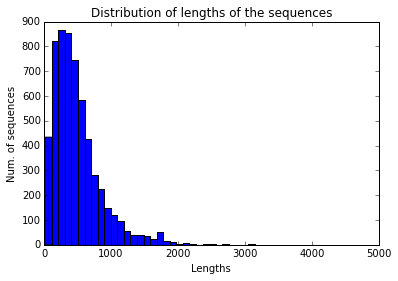

In [10]:
plt.hist(lengths_vals, bins = 50)
plt.title('Distribution of lengths of the sequences')
plt.xlabel('Lengths')
plt.ylabel('Num. of sequences')
plt.show()

In [11]:
max(lengths_vals) # max value

4910

In [12]:
max_seqs = filter(lambda x: x[1][1] == max(lengths_vals), seq_list) # max sequence(s)

In [13]:
max_seqs_names = map(lambda x: x[0], max_seqs)
if len(max_seqs) == 1:
    print "There is only one sequence with the maximum sequence length of %d" % max(lengths_vals)
else:
    print "There are %d sequences with the maximum length of %d" % (len(max_seqs), max(lengths_vals))
print max_seqs_names

There is only one sequence with the maximum sequence length of 4910
['YLR106C MDN1 SGDID:S000004096, Chr XII from 363738-349006, Genome Release 64-2-1, reverse complement, Verified ORF, "Huge dynein-related AAA-type ATPase (midasin); forms extended pre-60S particle with the Rix1 complex (Rix1p-Ipi1p-Ipi3p); acts in removal of ribosomal biogenesis factors at successive steps of pre-60S assembly and export from nucleus"']


In [14]:
min(lengths_vals)

16

In [15]:
min_seqs = filter(lambda x: x[1][1] == min(lengths_vals), seq_list) # min sequence(s)

In [16]:
min_seqs_names = map(lambda x: x[0], min_seqs)
if len(min_seqs) == 1:
    print "There is only one sequence with the minimum sequence length of %d" % min(lengths_vals)
else:
    print "There are %d sequences with the minimum length of %d" % (len(max_seqs), min(lengths_vals))
print min_seqs_names

There is only one sequence with the minimum sequence length of 16
['YJR151W-A YJR151W-A SGDID:S000028557, Chr X from 717580-717630, Genome Release 64-2-1, Uncharacterized ORF, "Putative protein of unknown function; identified by fungal homology and RT-PCR; predicted to have a role in transcription based on computational "guilt by association" analysis"']


## 3. Max = 4910, min = 16

In [17]:
def seq_to_letter_dict(sequence):
    '''
    Convert a sequence string
    to a dictionary of the following type:
    (key = letters, value = frequencies of letters)
    '''
    letter_dict = {}
    
    def update_dict(x): # additional function to update the dictionary
        try:
            letter_dict[x] += 1
        except KeyError: # when there is a new word, we need to initialise it
            letter_dict[x] = 1
    _ = map(update_dict, sequence)
    return letter_dict
    

In [18]:
seq_letter_dist_dict = dict(map(lambda (k, v): (k, seq_to_letter_dict(v)), seq_dict.iteritems()))

In [19]:
all_dicts = seq_letter_dist_dict.values()

In [20]:
from collections import Counter # for summing several dictionaries

In [21]:
whole_dict = Counter()
for dict_ in all_dicts:
    whole_dict += Counter(dict_)

In [22]:
# convert raw numbers to frequencies
# i.e. fractions, or ratios
total_number = sum(whole_dict.values())
for key, value in whole_dict.iteritems():
    whole_dict[key] = value / 1.0 / total_number

In [23]:
whole_dict

Counter({'A': 0.05493373740206835,
         'C': 0.01259784614490037,
         'D': 0.058518707276486656,
         'E': 0.06538422729550433,
         'F': 0.044172670975288986,
         'G': 0.049741841807774335,
         'H': 0.02167673703094991,
         'I': 0.06556858935659693,
         'K': 0.07348692277829179,
         'L': 0.09500905563185051,
         'M': 0.020805891376883597,
         'N': 0.061626524877761796,
         'P': 0.043773846924762154,
         'Q': 0.03954856948380333,
         'R': 0.044353612589979115,
         'S': 0.08984349747485544,
         'T': 0.059171670494716264,
         'V': 0.05559833013806632,
         'W': 0.010393710483155157,
         'Y': 0.03379401045630465})

## 4. Distribution of amino-acids

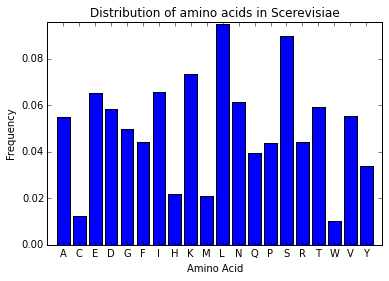

In [24]:
X = np.arange(len(whole_dict))
plt.bar(X, whole_dict.values(), align = 'center')
plt.xticks(X, whole_dict.keys(), rotation=0)
ymax = max(whole_dict.values()) + 0.001
plt.ylim(0, ymax)
plt.xlim(-1, 20)
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Distribution of amino acids in Scerevisiae')
plt.show()